# Resturant Reviews


***DataDescription***
> The data consists of 2 columns Review and Rating
> 
> Review: The reviews on Hotel were in the Review Column
> 
> Rating: The Ratings are denoted in the Rating column in the form of 1-5 
> 
> 1- Bad Review
> 
> 2- Average Review
>
> 3- Better Review
> 
> 4- Good Review
>
> 5- Best Review

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/Hotel_Reviews.csv


# Adding Basic Liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading the Data

In [3]:
df = pd.read_csv('/kaggle/input/hotel-reviews/Hotel_Reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# Getting the shape of data
df.shape

(20491, 2)

* **Setting Parameters**

In [5]:
vocab_size = 600
embedding_dim = 20
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20451

***Seperating data column to sentences and Labels***

In [6]:
sentences = df['Review'].tolist()
labels  = df['Rating'].tolist()

# Getting Training and Testing Data

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Setting Tokenizer And Padding data

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

***Converting data into arrays***

In [9]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Creating CNN model
# Adding Layers
# Compiling Models

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn,optimizer='adam',metrics=['accuracy'])

In [11]:
# Getting Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 20)          12000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 42)                882       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 258       
Total params: 13,140
Trainable params: 13,140
Non-trainable params: 0
_________________________________________________________________


# Fiting CNN Model

In [12]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
640/640 [==============================] - 3s 4ms/step - loss: 1.5375 - accuracy: 0.4167 - val_loss: 1.4777 - val_accuracy: 0.4250
Epoch 2/50
640/640 [==============================] - 2s 3ms/step - loss: 1.3416 - accuracy: 0.4448 - val_loss: 1.4510 - val_accuracy: 0.4250
Epoch 3/50
640/640 [==============================] - 2s 3ms/step - loss: 1.3008 - accuracy: 0.4513 - val_loss: 1.3021 - val_accuracy: 0.4750
Epoch 4/50
640/640 [==============================] - 2s 3ms/step - loss: 1.1849 - accuracy: 0.4653 - val_loss: 1.1341 - val_accuracy: 0.5000
Epoch 5/50
640/640 [==============================] - 2s 3ms/step - loss: 1.0465 - accuracy: 0.5169 - val_loss: 1.0338 - val_accuracy: 0.6250
Epoch 6/50
640/640 [==============================] - 2s 3ms/step - loss: 1.0034 - accuracy: 0.5439 - val_loss: 1.0433 - val_accuracy: 0.6250
Epoch 7/50
640/640 [==============================] - 2s 3ms/step - loss: 0.9770 - accuracy: 0.5601 - val_loss: 1.0056 - val_accuracy: 0.6250
Epoch 

# Plotting accuracy and loss Graph

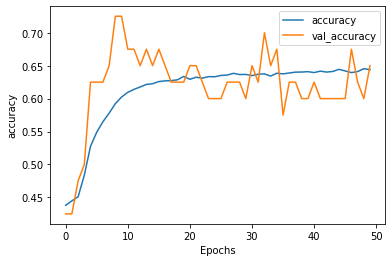

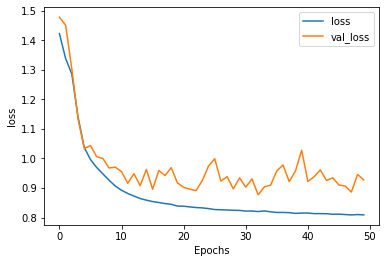

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

* The 1st Graph Show the Difference B/w Increase in accuracy and val_accuracy 
* The 2nd Graph show the difference b/w decrease in loss and val_loss

***Decoding Sentences*** 

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

nice hotel expensive parking got good deal stay hotel <OOV> arrived late evening took <OOV> previous reviews did <OOV> parking check quick easy little disappointed non <OOV> view room room clean nice size bed comfortable <OOV> <OOV> <OOV> high pillows not <OOV> like heard music room night morning <OOV> <OOV> doors <OOV> <OOV> hear people <OOV> <OOV> maybe just noisy <OOV> <OOV> bath <OOV> nice did not <OOV> stay nice touch taken <OOV> staying <OOV> location great walking distance shopping overall nice experience having pay <OOV> parking night ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

# Prediction on Testing Data

In [15]:
for n in range(10):
    print(testing_sentences[n],': ',testing_labels[n],'\n')

luxury trumps space believe reviews say rooms small, luxurious, service missteps related hotel getting speed staff anxious make amends, beware tourist map chatty concierge seriously misrepresents distance asian museum closer, hike half, finally in-house restaurant juno really good offering inventive menu terrific service,   :  4 

excellent wedding just ca n't say good things, beautiful setting over-the-top helpful staff great value, feel lucky got beginning sure booked,   :  5 

history beauty superb service stayed reading recent remodel, seattle embark alaskan cruise arctic club real highlights trip, spent time just photographing lobby bar gorgeous banquet hall ceiling, beds luxuriously comfortable ca n't help impressed glad way attitude employee, treat,   :  5 

loved arctic overall items working stayed smallest room type room 903 arctic club 3 nights attending conference, check-in smooth courteous, room small think nicest rooms stayed, bathroom nice shower rainfall style showerhead

> As we can see here the testing was all perfect!!!!!

> 1- Bad Review
> 
> 2- Average Review
>
> 3- Better Review
> 
> 4- Good Review
>
> 5- Best Review

# Getting Prediction with Randomly Created Reviews

In [16]:
# Checking Predictions
sentence = ["Feeling as though you are on top of the world, immerse yourself in the beauty that this unique landscape has to offer, bordered by pristine white beaches and the brilliant blues of the sea. Feel inspired by the hopes and dreams that have"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.3035318e-08 4.9636477e-01 3.5974643e-01 1.9397852e-01 2.7499172e-01
  5.3098053e-01]]


* As we can see the sentences i created randomly were Predicted almost perfectly
* **The reviews** was **good** to it got Rating which is **almost equals** to **5**

**This Model's Accuracy is 67.50%**

***Please Leave your Valuable feedback in the comments below!!!!!!***